In [1]:
class Queue:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def enqueue(self, value):
    self.data.append(value)

  def dequeue(self):
    return self.data.pop(0)

  def __str__(self):
    return str(self.data)


queue = Queue()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)

print(queue.dequeue())
print(queue.dequeue())
queue.enqueue(40)
print(queue.dequeue())
print(queue)

10
20
30
[40]


In [2]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    return self.data.pop()

  def __str__(self):
    return str(self.data)


stack = Stack()
stack.push(10)
stack.push(20)
stack.push(30)

print(stack.pop())
print(stack.pop())
stack.push(40)
print(stack.pop())
print(stack)

30
20
40
[10]


# Make undirected adjacency list

To convert a directed adjacency list to an undirected one, we need to ensure that for every directed edge $ u \rightarrow v $, we also include an edge $ v \rightarrow u $.

In [3]:
def make_undirected(adjacency_list):
  # Copy the original adjacency list
  undirected_list = {node: neighbors[:] for node, neighbors in adjacency_list.items()}

  for node in adjacency_list:
    for neighbor in adjacency_list[node]:
      # Add node to neighbor's list if not already present
      if node not in undirected_list[neighbor]:
        undirected_list[neighbor].append(node)

  # Sort neighbors of each node
  for node in undirected_list:
    undirected_list[node].sort()

  return undirected_list


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
make_undirected(adjacency_list)

{0: [1, 2], 1: [0, 3, 4], 2: [0, 3, 4], 3: [1, 2, 4], 4: [1, 2, 3]}

In [4]:
def is_undirected(adjacency_list):
  for node in adjacency_list:
    for neighbor in adjacency_list[node]:
      # Check if the reverse edge exists
      if node not in adjacency_list[neighbor]:
        return False
  return True


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
is_undirected(adjacency_list)

adjacency_list = {0: [1, 2], 1: [0, 3, 4], 2: [0, 4, 3], 3: [1, 2, 4], 4: [1, 2, 3]}
is_undirected(adjacency_list)

False

True

# Adjacency lists

## adjacency_list 1

In [12]:
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}

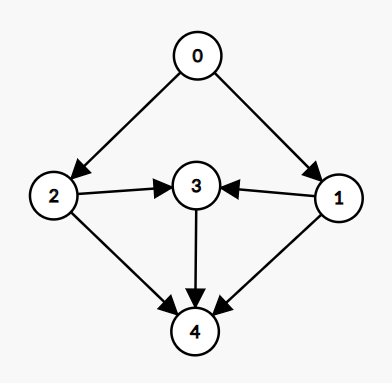

## adjacency_list 1 (undirected variant)

In [18]:
adjacency_list = {0: [1, 2], 1: [0, 3, 4], 2: [0, 3, 4], 3: [1, 2, 4], 4: [1, 2, 3]}

All the arrows are double headed (OMG, undirected graph is a special kind of directed graph): 😱👇

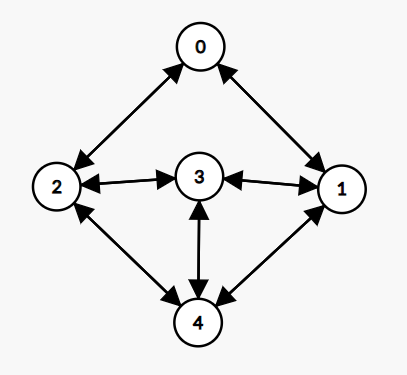

Or simply remove all the arrow heads: 😅👇

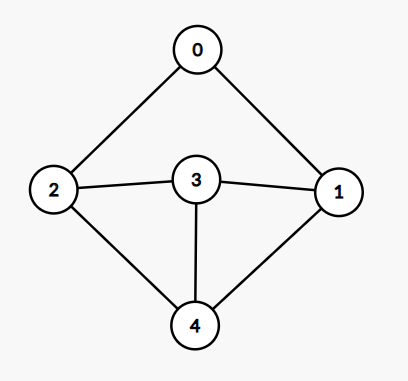

## adjacency_list 2

In [16]:
adjacency_list = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E', 'X'],
    'C': ['A', 'F', 'X'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E'],
    'X': []
}

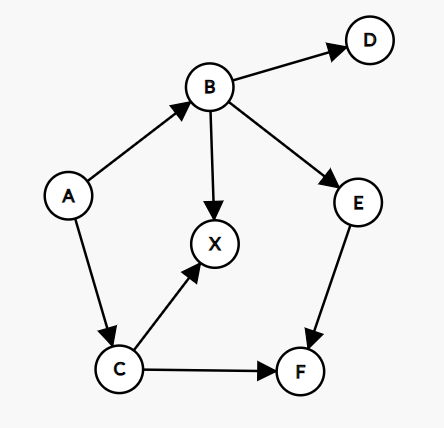

## adjacency_list 3

In [17]:
adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}

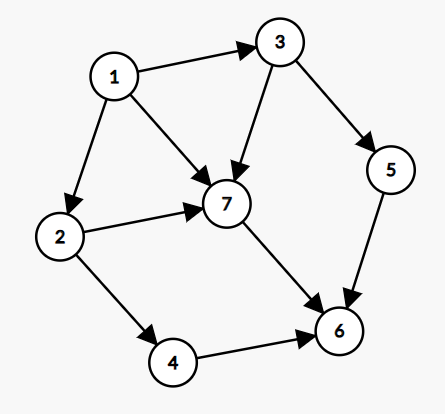

# BFS

In [6]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  order = []

  queue = Queue()
  queue.enqueue(start_vertex)
  visited[start_vertex] = True

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    order.append(curr_vertex)

    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        queue.enqueue(adj_vertex)
        visited[adj_vertex] = True
  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 2, 3, 4])

# DFS

In [7]:
def dfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  order = []

  stack = Stack()
  stack.push(start_vertex)
  visited[start_vertex] = True

  while not stack.is_empty():
    curr_vertex = stack.pop()
    order.append(curr_vertex)

    for adj_vertex in adjacency_list[curr_vertex]:
      if not visited[adj_vertex]:
        stack.push(adj_vertex)
        visited[adj_vertex] = True
  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 2, 3, 4, 1])

# DFS Recursive

In [8]:
def dfs_recursive(adjacency_list, curr_vertex, visited=None, order=None):
  if visited is None:
    visited = {vertex: False for vertex in adjacency_list}
    order = []

  visited[curr_vertex] = True
  order.append(curr_vertex)

  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      dfs_recursive(adjacency_list, adj_vertex, visited, order)
  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs_recursive(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 3, 4, 2])